<a href="https://colab.research.google.com/github/Chikuji/analise-python/blob/master/aula2_pratica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NÃO ESQUECER DE EXECUTAR OS CODIGOS DA AULA 1 PARA EXECUTAR OS DA AULA 2** 

# **Na pratica - Aula 1- 20200420**


In [0]:
print("Felipe Kenji")

Felipe Kenji


In [0]:
#atribuição de variável

nome_do_filme = "Totoro, o filme"

In [0]:
print(nome_do_filme)

Totoro, o filme


In [0]:
#importando a biblioteca pandas
import pandas as pd

In [0]:
#exportar um arquivo de filmes CSV (documentação: https://pandas.pydata.org/pandas-docs/stable/reference/io.html)

filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")
#filmes será um dataframe
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
#trocar os nomes das colunas de inglês para portugês
filmes.columns = ["filmeId","titulo","generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
# lendo a documentação de um método/atribulo
# basta colocar ? na frente do comando

?filmes.head

In [0]:
?filmes

In [0]:
#Quantidade de flmes no dataset filmes
len(filmes)

9742

In [0]:
#exportar dataset de avaliação dos filmes

avaliacoes = pd.read_csv("https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true")
avaliacoes.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [0]:
#.head() só visualisa 5 linhas, para descoprir a forma do dataset usaremos .shape

avaliacoes.shape

(100836, 4)

In [0]:
#para saber o numero de linhas len()

len(avaliacoes)

100836

In [0]:
#trocar os nomes das colunas de inglês para portugês

avaliacoes.columns = ["usuarioId","filmeId","nota","momento"]
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [0]:
#separar as avaliações do filmeId1 com o método avaliacoes.query("filmeId==1")
#ciando assim uma tabela apenas do filmeId1
avaliacoes_filme1 = avaliacoes.query("filmeId==1")
avaliacoes_filme1.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


In [0]:
#para analisar estatísticas gerais dessa tabela .describe()
avaliacoes_filme1.describe()

,usuarioId,filmeId,nota,momento
count,215.000000,215.0,215.000000,2.150000e+02
mean,306.530233,1.0,3.920930,1.129835e+09
std,180.419754,0.0,0.834859,2.393163e+08
min,1.000000,1.0,0.500000,8.293223e+08
25%,155.500000,1.0,3.500000,8.779224e+08
50%,290.000000,1.0,4.000000,1.106855e+09
75%,468.500000,1.0,4.500000,1.348523e+09
max,610.000000,1.0,5.000000,1.535710e+09


In [0]:
#calculando apenas a media do filme1
avaliacoes_filme1.mean()

usuarioId    3.065302e+02
filmeId      1.000000e+00
nota         3.920930e+00
momento      1.129835e+09
dtype: float64

In [0]:
#calcular toda a tabela de avaliacoes
avaliacoes.describe()

,usuarioId,filmeId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [0]:
#obter os valores da coluna de notas 
avaliacoes["nota"]

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [0]:
avaliacoes["nota"].mean()

3.501556983616962

In [0]:
#agora vamos calcular a média das notas apenas do filme1
avaliacoes_filme1["nota"].mean()

3.9209302325581397

In [0]:
#Queremos calcula a média de todos os filmes. O método .group(filmeId)
#ira agrupar a coluna de fimes, depois pegaremos a coluna["nota"] e tiramos a média .mean()

notas_medias_por_filme =avaliacoes.groupby("filmeId")["nota"].mean()
notas_medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

In [0]:
#Quantidade de filmes no dataset avaliacoes
len(notas_medias_por_filme)

9724

In [0]:
#criar um novo dataframe utilizando o .join() -> 
#filmes_com_media = filmes.join(notas_medias_por_filme, on="filmeId")

In [0]:
#primeiro veremos as tabelas que iremos unir
filmes

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [0]:
notas_medias_por_filme


filmeId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: nota, Length: 9724, dtype: float64

In [0]:
#aqui iremos unir as duas tabelas
filmes_com_media = filmes.join(notas_medias_por_filme, on="filmeId")
filmes_com_media.head()

,filmeId,titulo,generos,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [0]:
len(filmes_com_media)

9742

In [0]:
#organizar a tabela pela nota decrescente 
filmes_com_media.sort_values("nota",ascending=False).head(15)

,filmeId,titulo,generos,nota
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
4251,6201,Lady Jane (1986),Drama|Romance,5.0
8154,102217,Bill Hicks: Revelations (1993),Comedy,5.0
8148,102084,Justice League: Doom (2012),Action|Animation|Fantasy,5.0
4246,6192,Open Hearts (Elsker dig for evigt) (2002),Romance,5.0
9122,145994,Formula of Love (1984),Comedy,5.0


In [0]:
filmes_sem_nota = filmes_com_media[filmes_com_media["nota"].isna()]
filmes_sem_nota.head()

,filmeId,titulo,generos,nota
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN


Até aqui: análise e manipulação de dados

 **Agora iremos plotar gráficos**

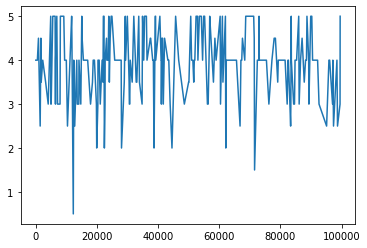

In [0]:
#primeiro utilizando .plot() nas avaliações pelas notas
avaliacoes.query("filmeId == 1")["nota"].plot()

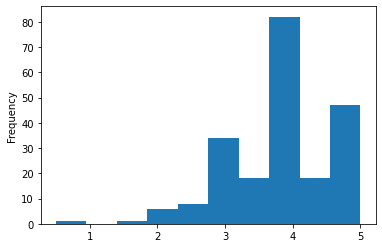

In [0]:
#para melhorar esse grafico mudaremos o parametro kind (filme Toy Story)
avaliacoes.query("filmeId == 1")["nota"].plot(kind='hist')

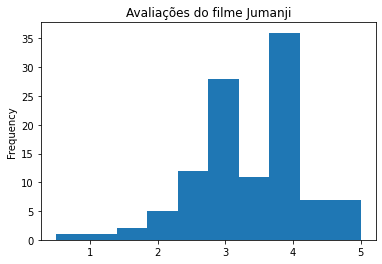

In [0]:
#vamos analiar o filme 2 o colocar título no gráfico
avaliacoes.query("filmeId == 2")["nota"].plot(kind='hist',title="Avaliações do filme Jumanji")

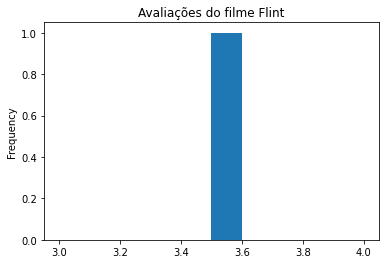

In [0]:
#vamos analiar o filme 2 o colocar título no gráfico
avaliacoes.query("filmeId == 193585")["nota"].plot(kind='hist',title="Avaliações do filme Flint")

# *Desafios - Aula 1*

## **DESAFIO 1**

In [0]:
# O Paulo fez uma análise rápida e disse que tem 18 filmes 
# sem avaliações, será que ele acertou?
filmes_sem_nota = filmes_com_media[filmes_com_media["nota"].isna()]
filmes_sem_nota.head(18)



,filmeId,titulo,generos,nota
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN


In [0]:
filmes_sem_nota.count()

filmeId    18
titulo     18
generos    18
nota        0
dtype: int64

In [0]:
len(filmes_sem_nota)

18

## **DESAFIO 2**

In [0]:
# Mudar o nome da coluna nota do dataframe filmes_com_media para nota_média após o join.
# OK -> filmes_com_media.columns = ["filmeId","titulo","generos","nota_media"] 
filmes_com_media.head()

,filmeId,titulo,generos,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [0]:
# filmes_com_media.rename(columns={'nota':'nota_media'}) pode ser assim tbm
filmes_com_media.columns = ["filmeId","titulo","generos","nota_media"] 
filmes_com_media.head()

,filmeId,titulo,generos,nota_media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


## **DESAFIO 3**

In [0]:
# Colocar o número de avaliações por filme, isto é, não só a média 
# mas o TOTAL de votos por filme.

notas_qtd_por_filme =avaliacoes.groupby("filmeId")["nota"].count()
notas_qtd_por_filme.columns = ["filmeId","qtd"]
notas_qtd_por_filme.head()

filmeId
1    215
2    110
3     52
4      7
5     49
Name: nota, dtype: int64

In [0]:
filmes_com_media

,filmeId,titulo,generos,nota_media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000
9739,193585,Flint (2017),Drama,3.500000
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000


In [0]:
# novo dataframe com a quantidade de votos

filmes_com_media_qtd = filmes_com_media.join(notas_qtd_por_filme, on="filmeId")
filmes_com_media_qtd.columns = ["filmeId","titulo","genero","nota_media","qtd_votos"]
filmes_com_media_qtd.sort_values("qtd_votos",ascending=True).head(20)


,filmeId,titulo,genero,nota_media,qtd_votos
9741,193609,Andrew Dice Clay: Dice Rules (1991),Comedy,4.0,1.0
3014,4032,"Everlasting Piece, An (2000)",Comedy,4.0,1.0
6670,57526,Untraceable (2008),Crime|Thriller,3.0,1.0
6669,57522,First Sunday (2008),Comedy|Crime,3.5,1.0
6667,57502,Cat Soup (Nekojiru-so) (2001),Adventure|Animation|Drama|Horror,4.0,1.0
6666,57499,Heaven and Earth (Ten to Chi to) (1990),Action|Adventure|Drama|War,3.0,1.0
6665,57421,Hatchet (2006),Comedy|Horror,4.0,1.0
6663,57326,In the Name of the King: A Dungeon Siege Tale ...,Action|Adventure|Fantasy,0.5,1.0
6659,57147,Cassandra's Dream (2007),Crime|Drama|Thriller,4.0,1.0
3025,4046,Friendly Persuasion (1956),Drama,4.0,1.0


## **DESAFIO 4**

In [0]:
notas_medias_por_filme =round(avaliacoes.groupby("filmeId")["nota"].mean(),2)
notas_medias_por_filme.head()

filmeId
1    3.92
2    3.43
3    3.26
4    2.36
5    3.07
Name: nota, dtype: float64

## **DESAFIO 5 & DESAFIO 6**

Descobrir os generos dos filmes (quais são eles, únicos). (esse aqui o bicho pega)
Contar o número de aparições de cada genero.

In [0]:
# primeiro importar numpy as np
# criar um data generos_filmes da tabela filmes_com_media
# criar generos que contabiliza quantos votos unicos por genero

import numpy as np

generos_filmes = filmes_com_media.generos.str.split(pat="|")
generos_filmes.head()

0    [Adventure, Animation, Children, Comedy, Fantasy]
1                       [Adventure, Children, Fantasy]
2                                    [Comedy, Romance]
3                             [Comedy, Drama, Romance]
4                                             [Comedy]
Name: generos, dtype: object

In [0]:
generos = pd.Series(np.concatenate(generos_filmes)).value_counts()
generos.head()

Drama       4361
Comedy      3756
Thriller    1894
Action      1828
Romance     1596
dtype: int64

## **DESAFIO 7**

Plotar o gráfico de aparições de cada genero. Pode ser um gráfico de tipo igual a barra.

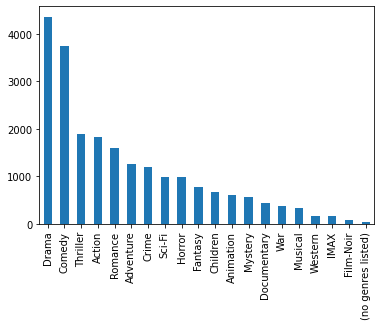

In [0]:
generos.plot(kind='bar')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

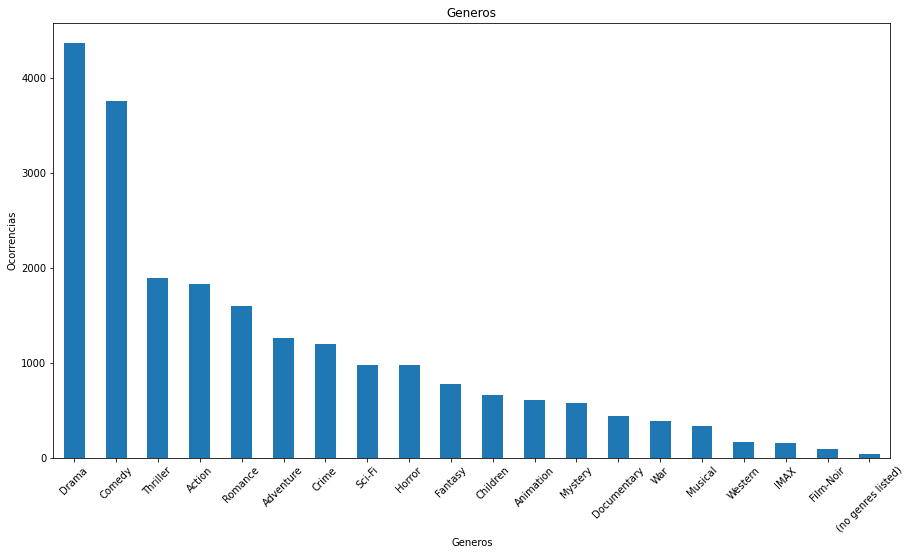

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
generos.plot(kind='bar',title='Generos')
plt.xlabel("Generos")
plt.ylabel("Ocorrencias")
plt.xticks(rotation=45)

# **Na pratica - Aula 2- 20200421**

Tecnicas de centralidade

Visualização de dados com Boxplot


In [0]:
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
# Primeiro iremos repetir a solução do desafio 5 anterior
# Separar os generos que estão agrupados na coluna

filmes["generos"].str.get_dummies('|').head(7)

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
6,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [0]:
#apos visualisar na tabela, iremos somar todos os 1 por genero .sum()
filmes["generos"].str.get_dummies('|').sum(axis=0)

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

In [0]:
# .value_counts()
filmes["generos"].str.get_dummies('|').sum(axis=1)

0       5
1       3
2       2
3       3
4       1
       ..
9737    4
9738    3
9739    1
9740    2
9741    1
Length: 9742, dtype: int64

In [0]:
#ordenando a tabela 
filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False)

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

In [0]:
# index
filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False).index

Index(['Drama', 'Comedy', 'Thriller', 'Action', 'Romance', 'Adventure',
       'Crime', 'Sci-Fi', 'Horror', 'Fantasy', 'Children', 'Animation',
       'Mystery', 'Documentary', 'War', 'Musical', 'Western', 'IMAX',
       'Film-Noir', '(no genres listed)'],
      dtype='object')

In [0]:
# values
filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False).values

array([4361, 3756, 1894, 1828, 1596, 1263, 1199,  980,  978,  779,  664,
        611,  573,  440,  382,  334,  167,  158,   87,   34])

In [0]:
# Ordenar por ordem alfabetica a série de dados extraida
filmes["generos"].str.get_dummies('|').sum().sort_index()

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

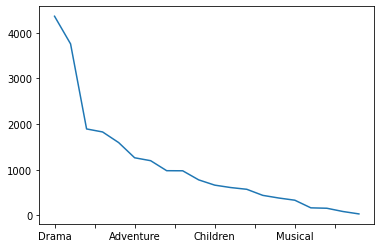

In [0]:
# Visualizar os dados em um grafico de linhas
# plot() padrão do pandas
filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False).plot()

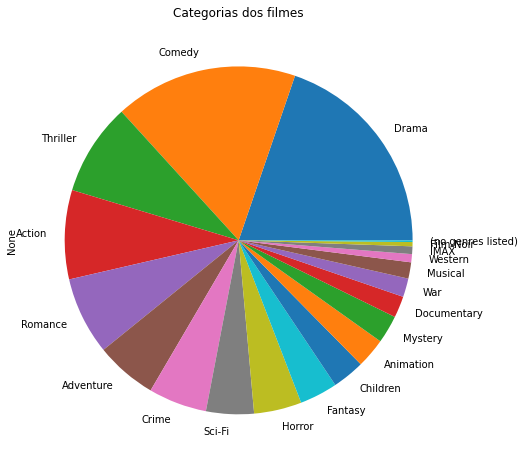

In [0]:
# Para melhorar a visualização iremos estilizar o gráfico
# Dentro do plot iremos modificar os parâmetros
#   kind='pie , title='Categorias', figsize=(8,8)
# plt.show()

filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False).plot(
    kind='pie',
    title='Categorias dos filmes',
    figsize=(8,8)
)
plt.show()

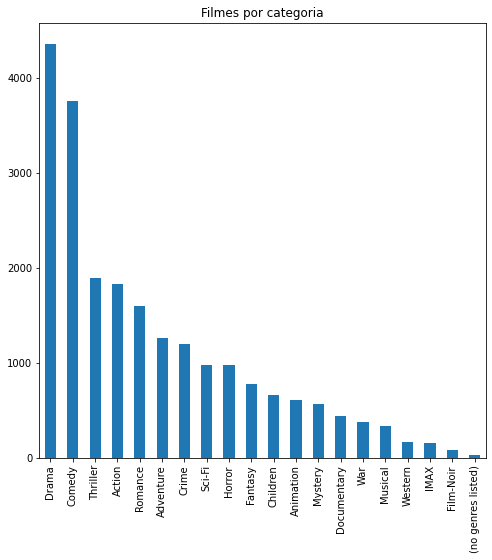

In [0]:
# O gráfico pizza fica confuso diante de tantas tags, para melhorar
# replicaremos o mesmo codigo porem com outro tipo de grpafico

filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False).plot(
    kind='bar',
    title='Filmes por categoria',
    figsize=(8,8)
)
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


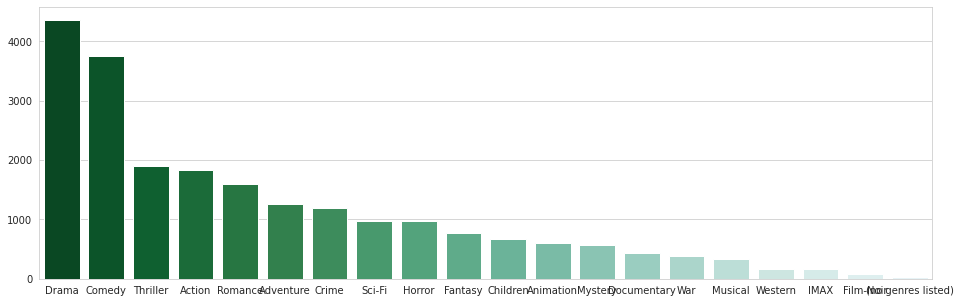

In [0]:
# melhorar o gráfico utilizando um gradiente de cor para expressar as quantidades
#

import seaborn as sns
sns.set_style("whitegrid")

filmes_por_genero = filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize=(16,5),)
sns.barplot(x=filmes_por_genero.index,
            y=filmes_por_genero.values,
           
            palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_genero)+2))



In [0]:
# Vamos aprofundar a analise das notas por filme
round((filmes_com_media.head()),2)

,filmeId,titulo,generos,nota_media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36
4,5,Father of the Bride Part II (1995),Comedy,3.07


3.9209302325581397


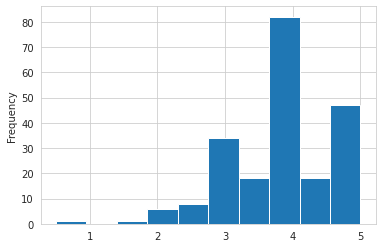

In [0]:
# pegaremos o exemplo d filme 1 e 2 
# Filme 1
notas_do_filme_1 = avaliacoes.query("filmeId==1")["nota"]
print(notas_do_filme_1.mean())
notas_do_filme_1.plot(kind='hist')

3.4318181818181817


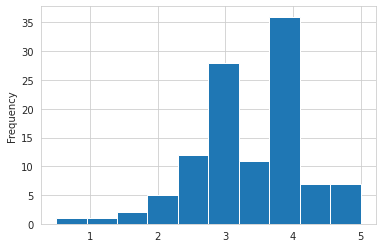

In [0]:
# Filme 2

notas_do_filme_1 = avaliacoes.query("filmeId==2")["nota"]
print(notas_do_filme_1.mean())
notas_do_filme_1.plot(kind='hist')

In [0]:
# Apesar ds gráficos serem parecidos a quantidade de votos pode dar falsa impressao
# com relação a média geral dos dados

# Há esse problema com referencia a média dos dados, uma maneira de interpretar melhor
# seria usar a mediana


In [0]:
# pegando um recorte de dados para entender melhor
filmes_com_media.sort_values("nota_media", ascending=False)[2490:2500]

,filmeId,titulo,generos,nota_media
7413,80463,"Social Network, The (2010)",Drama,3.885965
6151,44191,V for Vendetta (2006),Action|Sci-Fi|Thriller|IMAX,3.885000
7688,89492,Moneyball (2011),Drama,3.884615
6223,45728,Clerks II (2006),Comedy,3.884615
912,1211,"Wings of Desire (Himmel über Berlin, Der) (1987)",Drama|Fantasy|Romance,3.884615
6242,46578,Little Miss Sunshine (2006),Adventure|Comedy|Drama,3.883117
1230,1635,"Ice Storm, The (1997)",Drama,3.882353
225,261,Little Women (1994),Drama,3.880952
701,919,"Wizard of Oz, The (1939)",Adventure|Children|Fantasy|Musical,3.880435
968,1269,Arsenic and Old Lace (1944),Comedy|Mystery|Thriller,3.879310


In [0]:
# Nesse recorte tempos médias próximas porém a quantidade de votos são diferentes 
# Vamos criar a primeira função para facilitar a comparação entre os filmes

def plot_filme(n):
  notas_do_filme = avaliacoes.query(f"filmeId=={n}")["nota"]
  notas_do_filme.plot(kind='hist')
  return notas_do_filme.describe()

count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64

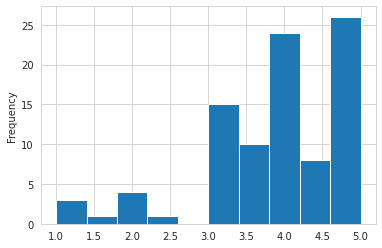

In [0]:
plot_filme(919)


count    77.000000
mean      3.883117
std       0.842522
min       1.000000
25%       3.500000
50%       4.000000
75%       4.500000
max       5.000000
Name: nota, dtype: float64

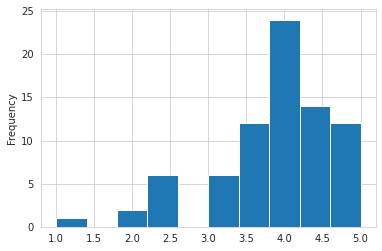

In [0]:
plot_filme(46578)

In [0]:
# Iremos incluir agora a visualização plot.box() para nos dar os quartis
# 25% 50% 75%

def plot_filme(n):
  notas_do_filme = avaliacoes.query(f"filmeId=={n}")["nota"]
  notas_do_filme.plot(kind='hist')
  plt.show()
  print('\n')
  notas_do_filme.plot.box()
  plt.show()
  return notas_do_filme.describe()

plot_filme(919)

In [0]:
# A linha verde que divide o box é a MEDIANA
# Parte superior representa o 3°Quartil de 75%
# Parte inferior representa o 1°Quartil de 25%
# Bolinha será um valor discrepante das notas

# Tudo isso com a utilização do boxplot


In [0]:
def plot_filme(n):
  notas_do_filme = avaliacoes.query(f"filmeId=={n}")["nota"]

  f, axes = plt.subplots(1,2,figsize=(16,6))


  notas_do_filme.plot(kind='hist', ax=axes[0])
  notas_do_filme.plot(kind='box', ax=axes[1])
  plt.show()

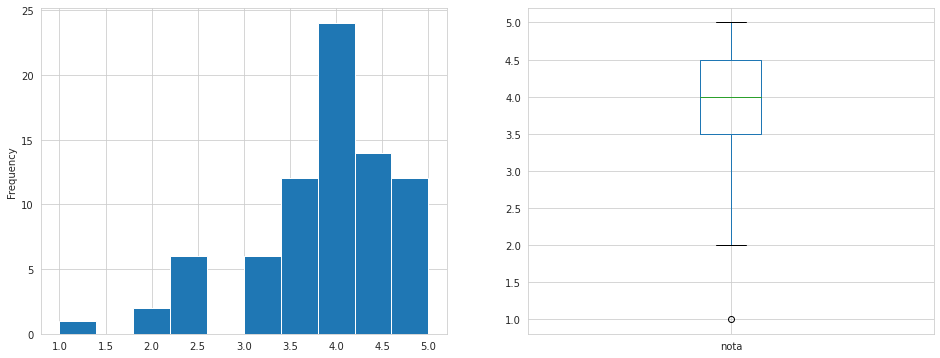

In [0]:
plot_filme(46578)

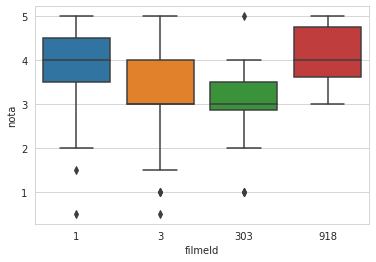

In [0]:
# Agora vamos analizar 4 filmes utilizando seaborn
# para plotar o boxplot

sns.boxplot(data = avaliacoes.query("filmeId in [1,3,918,303]"), x ="filmeId", y="nota")

# *Desafios - Aula 2*

## **DESAFIO 1**

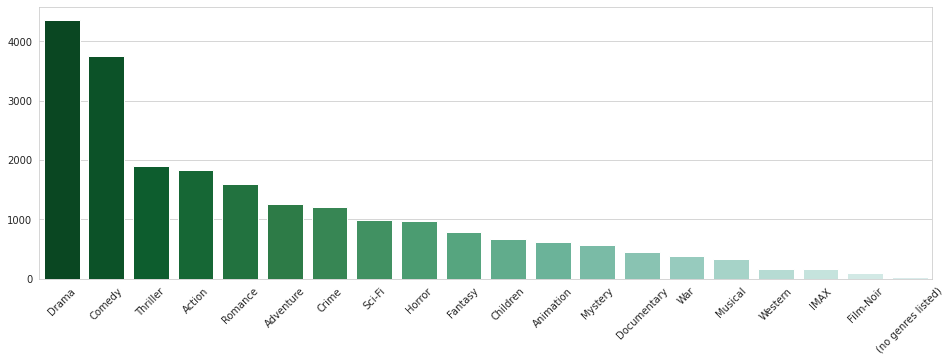

In [0]:
# Rotacionar os thicks (os nomes dos generos) do gráfico de barras verdes (o último), 
# de forma a deixar as legendas mais legíveis.
#plt.xlabel("Generos")
#plt.ylabel("Ocorrencias")


import seaborn as sns
sns.set_style("whitegrid")

filmes_por_genero = filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize=(16,5),)
plt.xticks(rotation=45)
sns.barplot(x=filmes_por_genero.index,
            y=filmes_por_genero.values,
           
            palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_genero)+4))

## **DESAFIO 2**

In [0]:
# Encontar vários filmes com médias próximas e distribuições diferentes, 
# use a função plot_filmes(n) para plotar.
# pegando um recorte com 10 filmes
filmes_com_media.sort_values("nota_media", ascending=False)[2490:2500]

,filmeId,titulo,generos,nota_media
7413,80463,"Social Network, The (2010)",Drama,3.885965
6151,44191,V for Vendetta (2006),Action|Sci-Fi|Thriller|IMAX,3.885000
7688,89492,Moneyball (2011),Drama,3.884615
6223,45728,Clerks II (2006),Comedy,3.884615
912,1211,"Wings of Desire (Himmel über Berlin, Der) (1987)",Drama|Fantasy|Romance,3.884615
6242,46578,Little Miss Sunshine (2006),Adventure|Comedy|Drama,3.883117
1230,1635,"Ice Storm, The (1997)",Drama,3.882353
225,261,Little Women (1994),Drama,3.880952
701,919,"Wizard of Oz, The (1939)",Adventure|Children|Fantasy|Musical,3.880435
968,1269,Arsenic and Old Lace (1944),Comedy|Mystery|Thriller,3.879310


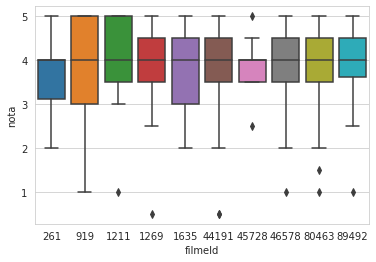

In [0]:
sns.boxplot(data = avaliacoes.query("filmeId in [80463,44191,89492,45728,1211,46578,1635,261,919,1269]"), x ="filmeId", y="nota")

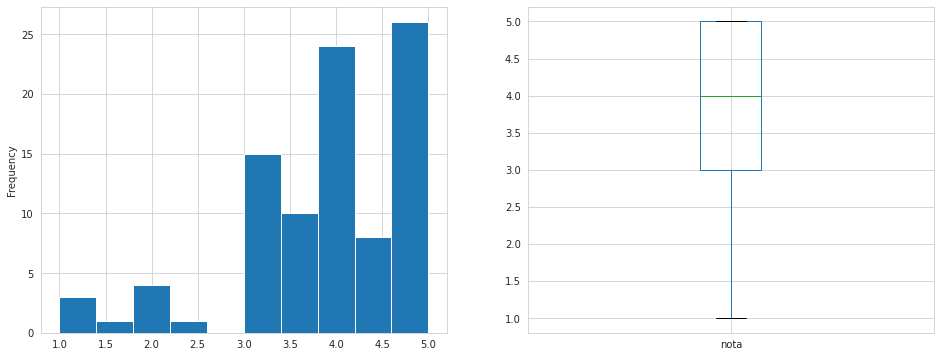

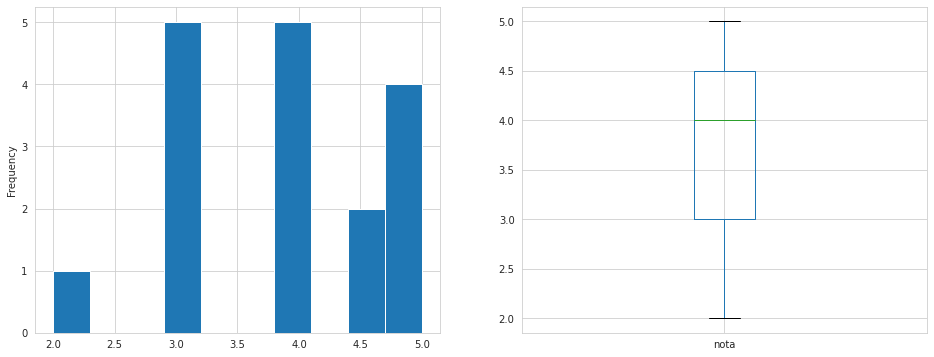

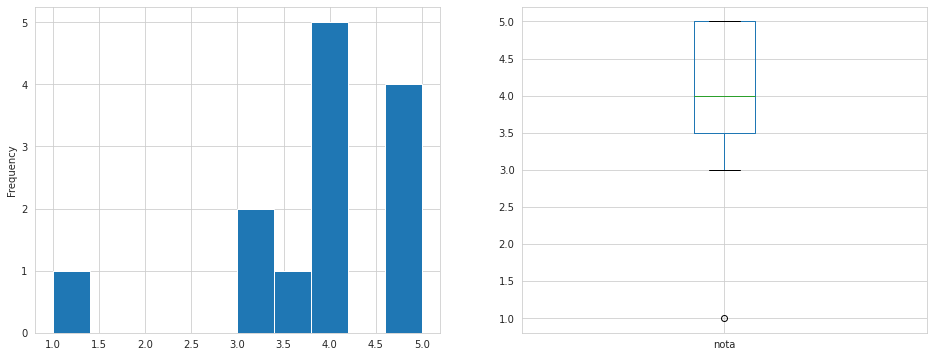

count    13.000000
mean      3.884615
std       1.120897
min       1.000000
25%       3.500000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64

In [0]:
plot_filme(919)
plot_filme(1635)
plot_filme(1211)

## **DESAFIO 3**

In [0]:
# Criar o boxplot dos 10 filmes com mais votos (não é com maior média, 
# é com mais votos!). Não apenas plot mas também analise e 
# tente tirar conclusões.
#filmes_com_media.sort_values("nota",ascending=False).head(15)

dezmaisvotados = filmes_com_media_qtd.sort_values("qtd_votos",ascending=False).head(10)
dezmaisvotados_titulos = dezmaisvotados['titulo'].to_list()
dezmaisvotados_ids = dezmaisvotados['filmeId'].to_list()

In [0]:
dezmaisvotados

,filmeId,titulo,genero,nota_media,qtd_votos
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.164134,329.0
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.429022,317.0
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.197068,307.0
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,4.161290,279.0
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.192446,278.0
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,4.231076,251.0
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,3.750000,238.0
97,110,Braveheart (1995),Action|Drama|War,4.031646,237.0
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,3.970982,224.0
461,527,Schindler's List (1993),Drama|War,4.225000,220.0


In [0]:
#Biblioteca boxplot


In [0]:
dezmaisvotados_ids

[356, 318, 296, 593, 2571, 260, 480, 110, 589, 527]

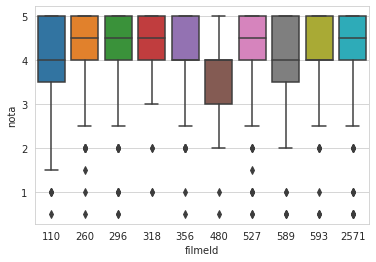

In [0]:
sns.boxplot(data = avaliacoes.query(f"filmeId in {dezmaisvotados_ids}"), x ="filmeId", y="nota")


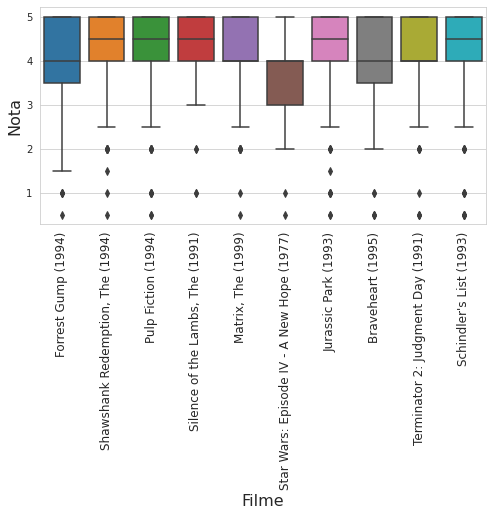

In [0]:
plt.figure(figsize=(8,4))

ax = sns.boxplot(x='filmeId',y='nota', data = avaliacoes.query(f"filmeId in {dezmaisvotados_ids}"))
ax.set_xticklabels(dezmaisvotados_titulos, fontsize=12)
ax.set_xlabel("Filme", fontsize=16)
ax.set_ylabel("Nota", fontsize=16)
plt.xticks(rotation=90)

plt.show()

## **DESAFIO 4**

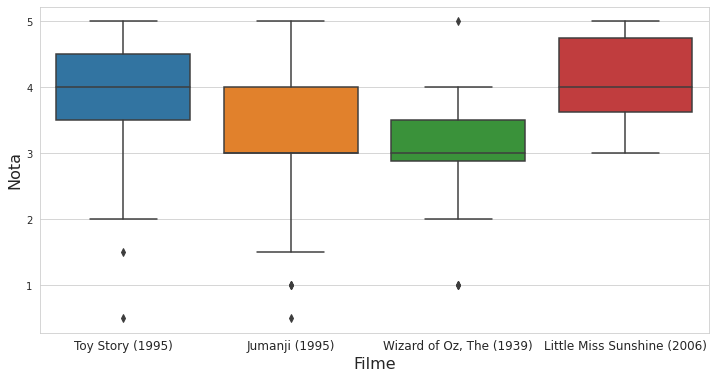

In [0]:
# Configurar a visualização do boxplot gerado pelo seaborn (último boxplot plotado na aula). Configurar o 
# tamanho e colocar o nome dos filmes nos thicks.
plt.figure(figsize=(12,6))
ax = sns.boxplot(data = avaliacoes.query("filmeId in [1,3,918,303]"), x ="filmeId", y="nota")

ax.set_xticklabels(filmes.query("filmeId in [1,2,919,46578]")['titulo'], fontsize=12)
ax.set_xlabel("Filme", fontsize=16)
ax.set_ylabel("Nota", fontsize=16)
plt.show()

## **DESAFIO 5**

In [0]:
# Calcular moda, média e mediana dos filmes. Explore filmes com notas mais próximas de 0.5, 3 e 5.

def explora_filme(filme_id):
    filme = filmes.query(f'filmeId == {filme_id}')
    notas = avaliacoes.query(f'filmeId == {filme_id}')['nota']
    
    print(f'Filme: {filme.iloc[0, 1]}')
    print()
    
    print(f'Moda: {notas.mode().values}')    
    print(f'Média: {notas.mean()}')
    print(f'Mediana: {notas.median()}')
    print('------------')

In [0]:
explora_filme(8387)
explora_filme(89386)
explora_filme(3774)

Filme: Police Academy: Mission to Moscow (1994)

Moda: [0.5]
Média: 0.8
Mediana: 0.5
------------
Filme: Pearl Jam Twenty (2011)

Moda: [0.5]
Média: 0.5
Mediana: 0.5
------------
Filme: House Party 2 (1991)

Moda: [0.5 1. ]
Média: 0.75
Mediana: 0.75
------------


## **DESAFIO 6**

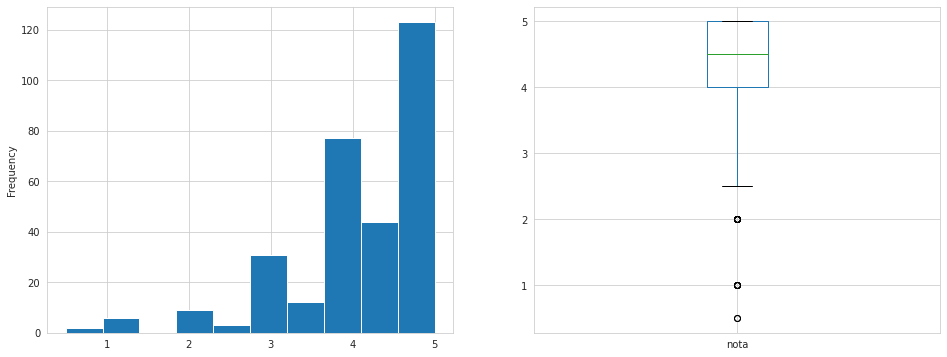

In [0]:
# Plotar o boxplot e o histograma um do lado do outro (na mesma figura ou em figuras distintas, mas um do lado do outro).
pulp_fiction = avaliacoes.query('filmeId == 296')['nota']

f, axes = plt.subplots(1, 2, figsize=(16, 6))

pulp_fiction.plot(kind='hist', ax=axes[0])
pulp_fiction.plot(kind='box', ax=axes[1])

plt.show()

## **DESAFIO 7**

In [0]:
# Criar um gráfico de notas médias por ano (média geral considerando todos os filmes lançados naquele ano).
filmes_com_media_e_ano = filmes_com_media.copy()
filmes_com_media_e_ano['ano'] = filmes_com_media['titulo'].str.extract("\((\d{4})\)")
filmes_com_media_e_ano.head()

,filmeId,titulo,generos,nota_media,ano
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,1995
4,5,Father of the Bride Part II (1995),Comedy,3.071429,1995


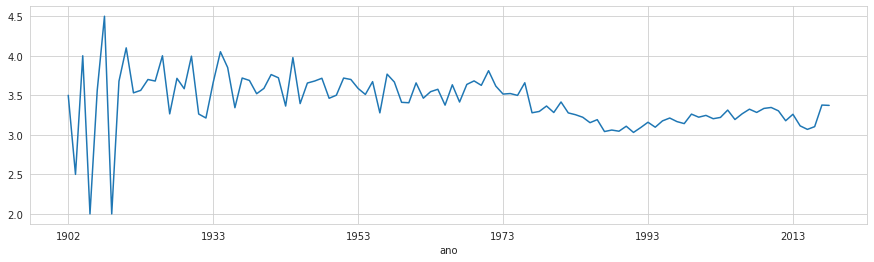

In [0]:
nota_media_por_ano = filmes_com_media_e_ano.groupby('ano')['nota_media'].mean()

plt.figure(figsize=(15, 4))
nota_media_por_ano.plot()